In [105]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
import matplotlib.pylab as pylab
import imageio
from matplotlib.pyplot import imread
import cv2
import PIL
import time

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

# Đọc ảnh từ thư mục và sử dụng thư viện matplotlyb để xuất anh

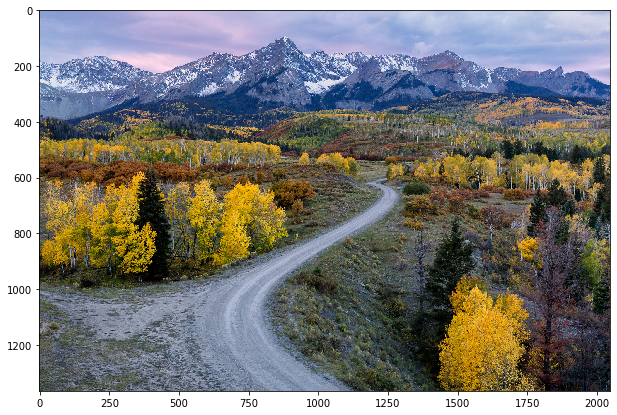

In [106]:
#im = plt.imread("1200px-Coleen_Gray_in_Kansas_City_Confidential.jpg")
#im = plt.imread("413123-637280775885480151-16x9.jpg")
im = plt.imread("Best-of-2016-Nasim-Mansurov-28.jpg")
#im = plt.imread("cat.jpeg")
f = plt.figure()
plt.imshow(im)

In [107]:
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

In [108]:
def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

In [109]:
start_time = time.time()
imsize = im.shape
dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i + 8), j:(j + 8)] = dct2(im[i:(i + 8), j:(j + 8)])

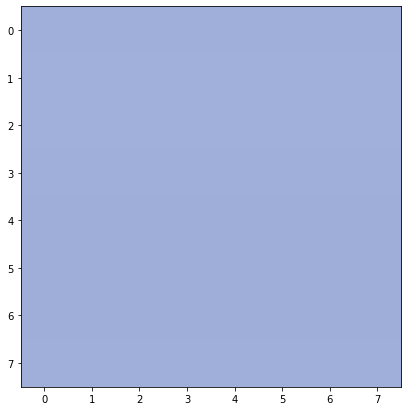

In [110]:
pos = 128 

plt.figure()
plt.imshow(im[pos: pos + 8, pos: pos + 8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


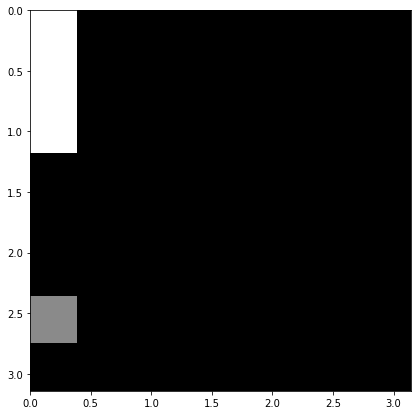

In [111]:
plt.figure()
plt.imshow(dct[pos:pos + 8, pos:pos + 8], vmax = np.max(dct)*0.01, vmin = 0, extent = [0, pi, pi, 0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


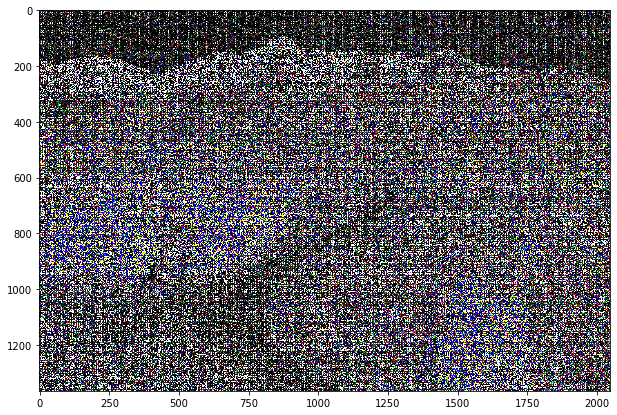

In [112]:
plt.figure()
plt.imshow(dct,vmax = np.max(dct) * 0.01, vmin = 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
0.21748654990842492


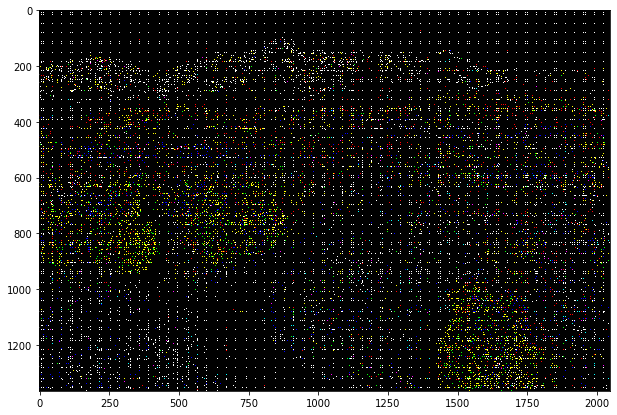

In [113]:
thresh = 0.02
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))

plt.figure()
plt.imshow(dct_thresh, vmax = np.max(dct)*0.01, vmin = 0)

percent_nonzeros = np.sum(dct_thresh != 0.0) / (imsize[0] * imsize[1]*1.0)

print(percent_nonzeros)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
13.400732278823853


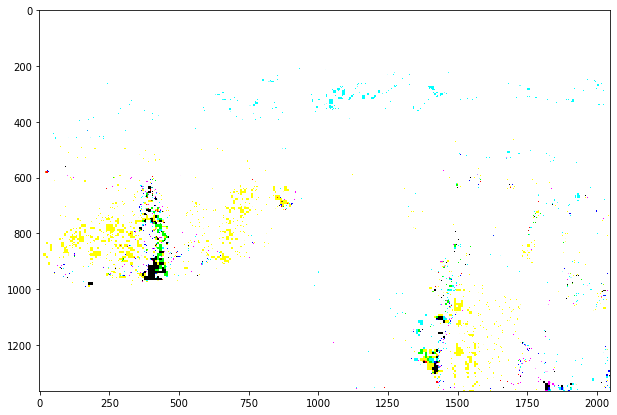

In [114]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8), j:(j+8)] )
        
        
plt.figure()
plt.imshow(im_dct)
print(time.time() - start_time)

In [115]:
#cv2.imwrite('DCT_image.jpg',im_dct)
#cv2.imwrite('DCT_image1.jpg',im_dct)
#cv2.imwrite('DCT_image2.jpg',im_dct)
cv2.imwrite('DCT_image3.jpg',im_dct)

True

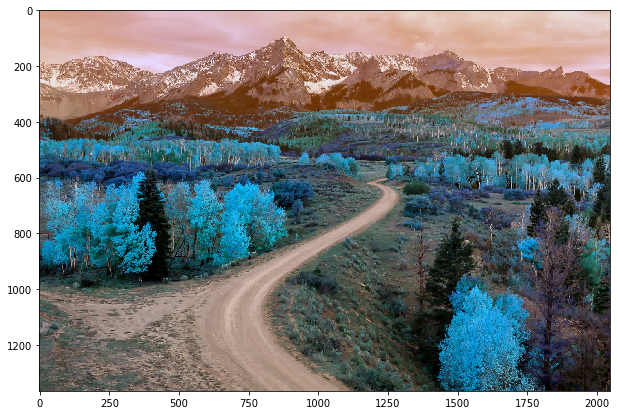

In [116]:
#imdct = plt.imread("DCT_image.jpg")
#imdct = plt.imread("DCT_image1.jpg")
#imdct = plt.imread("DCT_image2.jpg")
imdct = plt.imread("DCT_image3.jpg")
f = plt.figure()
plt.imshow(imdct)